In [1]:
import os

# Verificar se HADOOP_HOME está configurado
print("HADOOP_HOME:", os.environ.get("HADOOP_HOME"))

# Verificar se hadoop.home.dir está configurado
print("hadoop.home.dir:", os.environ.get("hadoop.home.dir"))

HADOOP_HOME: C:\Users\Big Data\hadoop\bin
hadoop.home.dir: C:\hadoop


In [2]:
from pyspark.sql import SparkSession

# Inicializando a sessão Spark
spark = SparkSession.builder \
    .appName("PredictDropout") \
    .getOrCreate()

# Verificando se a sessão foi criada
print(spark)

In [3]:
# Lista de tabelas
tables = [
    "alunos", "curriculum", "disciplinas_1979", "disciplinas_1990", "disciplinas_1999", "disciplinas_2017", "disciplinas_2023",
    "matriculas", "tabela_alunos", "tabela_cursos", "tabela_dados_ingresso", "tabela_dados_pessoais", "tabela_disciplinas", "tabela_motivo_evasao"
]

# Carregando as tabelas
dataframes = {table: spark.read.csv(f"E:/Mestrado UFCG/Semestre 2024.2/Dados/Tabelas_0/{table}.csv", header=True, inferSchema=True) for table in tables}

In [4]:
print (tables)

['alunos', 'curriculum', 'disciplinas_1979', 'disciplinas_1990', 'disciplinas_1999', 'disciplinas_2017', 'disciplinas_2023', 'matriculas', 'tabela_alunos', 'tabela_cursos', 'tabela_dados_ingresso', 'tabela_dados_pessoais', 'tabela_disciplinas', 'tabela_motivo_evasao']


In [5]:
print(dataframes)

{'alunos': DataFrame[MATRICULA;ID_CIDADAO;NOME;IDADE;E-MAIL;GENERO;ESTADO_CIVIL_ALUNOS;NACIONALIDADE;LOCAL_NASCIMENTO;ESTADO;TERMO_ESTADO;RAZAO_INATIVIDADE;TIPO_ADMISSAO;TERMO_ADMISSAO;POLITICA_AFIRMATIVA;TIPO_ENSINO_MEDIO;ANO_FORMATURA_ENSINO_MEDIO;CODIGO_CURSO;CODIGO_CURRICULAR; ALUNOS_ATIVOS;EX_ALUNOS;ALUNOS_INATIVOS: string], 'curriculum': DataFrame[CODIGO_CURSO;CODIGO_CURRICULAR;TERMO_NUMERO_MINIMO;TERMO_NUMERO_MAXIMO;NUMERO_MINIMO_CREDITO_INSCRITO;NUMERO_MAXIMO_CREDITOS_INSCRITOS;MINIMO_CREDITO_OBRIGATORIOS_NECESSARIO;MINIMO_CREDITO_OPCIONAIS_NECESSARIOS;MINIMO_CREDITOS_COMPLEMENTARES_NECESSARIOS;MINIMO_ATIVIDADES_EXTENSAO_ACADEMICA: string], 'disciplinas_1979': DataFrame[CODIGO_CURSO;CODIGO_CURRICULAR;CODIGO_DISCIPLINA;NOME_DISCIPLINA;CREDITOS_DISCIPLINA;HORAS_DISCIPLINA;TIPO;SEMESTRE_IDEAL: string], 'disciplinas_1990': DataFrame[CODIGO_CURSO;CODIGO_CURRICULAR;CODIGO_DISCIPLINA;NOME_DISCIPLINA;CREDITOS;HORAS_DISCIPLINA;TIPO;SEMESTRE_IDEAL: string], 'disciplinas_1999': DataFrame[

### Trocar delimitador ###

In [6]:
# Carregando as tabelas com o delimitador correto
dataframes = {
    table: spark.read.csv(
        f"E:/Mestrado UFCG/Semestre 2024.2/Dados/Tabelas_0/{table}.csv",
        header=True,
        sep=";",  # Especifica o delimitador como ;
        inferSchema=True
    )
    for table in tables
}

In [7]:
for table, df in dataframes.items():
    print(f"Tabela: {table}")
    print("Schema:")
    df.printSchema()
    print("Primeiras linhas:")
    df.show(5, truncate=False)
    print("\n")

Tabela: alunos
Schema:
root
 |-- MATRICULA: integer (nullable = true)
 |-- ID_CIDADAO: long (nullable = true)
 |-- NOME: string (nullable = true)
 |-- IDADE: integer (nullable = true)
 |-- E-MAIL: string (nullable = true)
 |-- GENERO: string (nullable = true)
 |-- ESTADO_CIVIL_ALUNOS: string (nullable = true)
 |-- NACIONALIDADE: string (nullable = true)
 |-- LOCAL_NASCIMENTO: string (nullable = true)
 |-- ESTADO: string (nullable = true)
 |-- TERMO_ESTADO: double (nullable = true)
 |-- RAZAO_INATIVIDADE: string (nullable = true)
 |-- TIPO_ADMISSAO: string (nullable = true)
 |-- TERMO_ADMISSAO: double (nullable = true)
 |-- POLITICA_AFIRMATIVA: string (nullable = true)
 |-- TIPO_ENSINO_MEDIO: string (nullable = true)
 |-- ANO_FORMATURA_ENSINO_MEDIO: integer (nullable = true)
 |-- CODIGO_CURSO: integer (nullable = true)
 |-- CODIGO_CURRICULAR: integer (nullable = true)
 |--  ALUNOS_ATIVOS: boolean (nullable = true)
 |-- EX_ALUNOS: boolean (nullable = true)
 |-- ALUNOS_INATIVOS: boolean (

### Visualizar a base como ficou ###

In [8]:
print(dataframes)

{'alunos': DataFrame[MATRICULA: int, ID_CIDADAO: bigint, NOME: string, IDADE: int, E-MAIL: string, GENERO: string, ESTADO_CIVIL_ALUNOS: string, NACIONALIDADE: string, LOCAL_NASCIMENTO: string, ESTADO: string, TERMO_ESTADO: double, RAZAO_INATIVIDADE: string, TIPO_ADMISSAO: string, TERMO_ADMISSAO: double, POLITICA_AFIRMATIVA: string, TIPO_ENSINO_MEDIO: string, ANO_FORMATURA_ENSINO_MEDIO: int, CODIGO_CURSO: int, CODIGO_CURRICULAR: int,  ALUNOS_ATIVOS: boolean, EX_ALUNOS: boolean, ALUNOS_INATIVOS: boolean], 'curriculum': DataFrame[CODIGO_CURSO: int, CODIGO_CURRICULAR: int, TERMO_NUMERO_MINIMO: int, TERMO_NUMERO_MAXIMO: int, NUMERO_MINIMO_CREDITO_INSCRITO: int, NUMERO_MAXIMO_CREDITOS_INSCRITOS: int, MINIMO_CREDITO_OBRIGATORIOS_NECESSARIO: int, MINIMO_CREDITO_OPCIONAIS_NECESSARIOS: int, MINIMO_CREDITOS_COMPLEMENTARES_NECESSARIOS: int, MINIMO_ATIVIDADES_EXTENSAO_ACADEMICA: int], 'disciplinas_1979': DataFrame[CODIGO_CURSO: int, CODIGO_CURRICULAR: int, CODIGO_DISCIPLINA: int, NOME_DISCIPLINA: s

### Funções de Limpeza ###

In [9]:
from pyspark.sql.functions import col, mean, when, trim, lower, min, max

# Função para tratamento de valores ausentes
def handle_missing_values(df, strategy="mean"):
    for column in df.columns:
        if df.select(column).distinct().count() > 1:  # Evita erro com colunas únicas
            if strategy == "mean" and df.schema[column].dataType in ['int', 'double', 'float']:
                mean_value = df.select(mean(col(column))).collect()[0][0]
                df = df.withColumn(column, when(col(column).isNull(), mean_value).otherwise(col(column)))
            elif strategy == "median" and df.schema[column].dataType in ['int', 'double', 'float']:
                median_value = df.approxQuantile(column, [0.5], 0.01)[0]
                df = df.withColumn(column, when(col(column).isNull(), median_value).otherwise(col(column)))
            elif strategy == "mode":
                mode_value = df.groupBy(column).count().orderBy(col("count").desc()).first()[0]
                df = df.withColumn(column, when(col(column).isNull(), mode_value).otherwise(col(column)))
            elif strategy == "drop":
                df = df.na.drop()
    return df

# Função para remoção de outliers
def remove_outliers(df, column):
    if df.schema[column].dataType in ['int', 'double', 'float']:
        quantiles = df.approxQuantile(column, [0.25, 0.75], 0.01)
        q1, q3 = quantiles[0], quantiles[1]
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df.filter((col(column) >= lower_bound) & (col(column) <= upper_bound))
    return df

# Função para padronização de categorias
def standardize_categories(df, column):
    df = df.withColumn(column, col(column).cast("string"))
    df = df.withColumn(column, trim(lower(col(column))))  # Remove espaços e converte para minúsculas
    return df

### Salvando Dados Tratados com PySpark ###

### Aplicação das Transformações ###

In [11]:
# Aplicando as transformações nas tabelas
for table, df in dataframes.items():
    print(f"Processando tabela: {table}")
    
    # Tratamento de valores ausentes
    df = handle_missing_values(df, strategy="mean")
    
    # Remoção de outliers e padronização de categorias
    for col_name in df.columns:
        if df.schema[col_name].dataType in ['int', 'double', 'float']:
            df = remove_outliers(df, col_name)  # Remoção de outliers
        else:
            df = standardize_categories(df, col_name)  # Padronização de categorias
    
    # Remoção de duplicatas
    df = df.dropDuplicates()
    
    # Salvando a tabela limpa no novo local
    try:
        df.write.mode("overwrite").csv(f"file:///C:/Users/Big Data/Documents/databrikcs/tabelas_tratadas/cleaned_{table}", header=True)
        print(f"Tabela {table} processada e salva com sucesso!\n")
    except Exception as e:
        print(f"Erro ao salvar a tabela {table}: {e}\n")

print("Processamento concluído! As tabelas limpas foram salvas com o prefixo 'cleaned_'.")

Processando tabela: alunos
Erro ao salvar a tabela alunos: An error occurred while calling o2080.csv.
: java.lang.RuntimeException: java.io.FileNotFoundException: Hadoop bin directory does not exist: C:\Users\Big Data\hadoop\bin\bin -see https://wiki.apache.org/hadoop/WindowsProblems
	at org.apache.hadoop.util.Shell.getWinUtilsPath(Shell.java:735)
	at org.apache.hadoop.util.Shell.getSetPermissionCommand(Shell.java:270)
	at org.apache.hadoop.util.Shell.getSetPermissionCommand(Shell.java:286)
	at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:978)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkOneDirWithMode(RawLocalFileSystem.java:660)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:700)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:699)
	at org.apache.hadoop.fs.RawLocalFileSystem

In [12]:
# Aplicando as transformações nas tabelas
for table, df in dataframes.items():
    print(f"Processando tabela: {table}")
    df = handle_missing_values(df, strategy="mean")  # Tratamento de valores ausentes
    for col_name in df.columns:
        if df.schema[col_name].dataType in ['int', 'double', 'float']:
            df = remove_outliers(df, col_name)  # Remoção de outliers
        else:
            df = standardize_categories(df, col_name)  # Normalização de categorias
    
    df = df.dropDuplicates()  # Remoção de duplicatas

    # Verificações antes de salvar
    print(f"Verificando DataFrame: {table}")
    df.printSchema()
    df.show(5)
    print(f"Número de linhas: {df.count()}")

    # Salvando o DataFrame
    try:
        df.write.mode("overwrite").csv(f"file:///E:/Mestrado UFCG/Semestre 2024.2/Dados/Tabelas_0/cleaned_{table}", header=True)
        print(f"Tabela {table} salva com sucesso!")
    except Exception as e:
        print(f"Erro ao salvar a tabela {table}: {e}")

Processando tabela: alunos
Verificando DataFrame: alunos
root
 |-- MATRICULA: string (nullable = true)
 |-- ID_CIDADAO: string (nullable = true)
 |-- NOME: string (nullable = true)
 |-- IDADE: string (nullable = true)
 |-- E-MAIL: string (nullable = true)
 |-- GENERO: string (nullable = true)
 |-- ESTADO_CIVIL_ALUNOS: string (nullable = true)
 |-- NACIONALIDADE: string (nullable = true)
 |-- LOCAL_NASCIMENTO: string (nullable = true)
 |-- ESTADO: string (nullable = true)
 |-- TERMO_ESTADO: string (nullable = true)
 |-- RAZAO_INATIVIDADE: string (nullable = true)
 |-- TIPO_ADMISSAO: string (nullable = true)
 |-- TERMO_ADMISSAO: string (nullable = true)
 |-- POLITICA_AFIRMATIVA: string (nullable = true)
 |-- TIPO_ENSINO_MEDIO: string (nullable = true)
 |-- ANO_FORMATURA_ENSINO_MEDIO: string (nullable = true)
 |-- CODIGO_CURSO: string (nullable = true)
 |-- CODIGO_CURRICULAR: string (nullable = true)
 |--  ALUNOS_ATIVOS: string (nullable = true)
 |-- EX_ALUNOS: string (nullable = true)
 |

### Salvando Dados Tratados com Pandas ###

In [14]:
import pandas as pd

# Aplicando as transformações nas tabelas
for table, df in dataframes.items():
    print(f"Processando tabela: {table}")
    
    # Tratamento de valores ausentes
    df = handle_missing_values(df, strategy="mean")
    
    # Remoção de outliers e padronização de categorias
    for col_name in df.columns:
        if df.schema[col_name].dataType in ['int', 'double', 'float']:
            df = remove_outliers(df, col_name)  # Remoção de outliers
        else:
            df = standardize_categories(df, col_name)  # Padronização de categorias
    
    # Remoção de duplicatas
    df = df.dropDuplicates()
    
    # Converter o DataFrame do PySpark para Pandas
    pandas_df = df.toPandas()
    
    # Salvar o DataFrame como CSV usando Pandas
    try:
        output_path = f"C:/Users/Big Data/Documents/databrikcs/tabelas_tratadas/cleaned_{table}.csv"
        pandas_df.to_csv(output_path, index=False, sep=";")  # Separação por ;
        print(f"Tabela {table} salva com sucesso em: {output_path}\n")
    except Exception as e:
        print(f"Erro ao salvar a tabela {table}: {e}\n")

print("Processamento concluído! As tabelas limpas foram salvas com o prefixo 'cleaned_'.")

Processando tabela: alunos
Tabela alunos salva com sucesso em: C:/Users/Big Data/Documents/databrikcs/tabelas_tratadas/cleaned_alunos.csv

Processando tabela: curriculum
Tabela curriculum salva com sucesso em: C:/Users/Big Data/Documents/databrikcs/tabelas_tratadas/cleaned_curriculum.csv

Processando tabela: disciplinas_1979
Tabela disciplinas_1979 salva com sucesso em: C:/Users/Big Data/Documents/databrikcs/tabelas_tratadas/cleaned_disciplinas_1979.csv

Processando tabela: disciplinas_1990
Tabela disciplinas_1990 salva com sucesso em: C:/Users/Big Data/Documents/databrikcs/tabelas_tratadas/cleaned_disciplinas_1990.csv

Processando tabela: disciplinas_1999
Tabela disciplinas_1999 salva com sucesso em: C:/Users/Big Data/Documents/databrikcs/tabelas_tratadas/cleaned_disciplinas_1999.csv

Processando tabela: disciplinas_2017
Tabela disciplinas_2017 salva com sucesso em: C:/Users/Big Data/Documents/databrikcs/tabelas_tratadas/cleaned_disciplinas_2017.csv

Processando tabela: disciplinas_20

### Carregar as Tabelas Relevantes ###

In [15]:
import pandas as pd

# Caminho para as tabelas tratadas
base_path = "C:/Users/Big Data/Documents/databrikcs/tabelas_tratadas/"

# Carregar as tabelas relevantes
alunos = pd.read_csv(f"{base_path}cleaned_alunos.csv", sep=";")
matriculas = pd.read_csv(f"{base_path}cleaned_matriculas.csv", sep=";")
motivo_evasao = pd.read_csv(f"{base_path}cleaned_tabela_motivo_evasao.csv", sep=";")
dados_pessoais = pd.read_csv(f"{base_path}cleaned_tabela_dados_pessoais.csv", sep=";")
dados_ingresso = pd.read_csv(f"{base_path}cleaned_tabela_dados_ingresso.csv", sep=";")

# Exibir as primeiras linhas de cada tabela
print("Tabela alunos:")
print(alunos.head())

print("\nTabela matriculas:")
print(matriculas.head())

print("\nTabela motivo_evasao:")
print(motivo_evasao.head())

print("\nTabela dados_pessoais:")
print(dados_pessoais.head())

print("\nTabela dados_ingresso:")
print(dados_ingresso.head())

Tabela alunos:
   MATRICULA    ID_CIDADAO                           NOME  IDADE  \
0  112110103  6.534463e+09              uian sol gorgonio     38   
1  112210472  9.758105e+09       rodrigo loiola de farias     29   
2  113111418  1.033938e+10      daniel florentino de lima     29   
3  113112637  6.355446e+09  bianca rosa paschoal lia fook     29   
4  113210421  1.015332e+10  jean matheus cabral de araujo     30   

                       E-MAIL     GENERO ESTADO_CIVIL_ALUNOS NACIONALIDADE  \
0          sol.uian@gmail.com  masculino            solteiro    brasileira   
1    rodrigo.loiola@gmail.com  masculino            solteiro    brasileira   
2  socorro.lima@sad.pe.gov.br  masculino            solteiro    brasileira   
3      biancafook@hotmail.com   feminino            solteiro    brasileira   
4   janmatheus_ca@hotmail.com  masculino            solteiro    brasileira   

      LOCAL_NASCIMENTO   ESTADO  ...  TIPO_ADMISSAO TERMO_ADMISSAO  \
0  campina grande - pb  inativo  ... 

### Análise Exploratória e Visualização ###
Agora, vamos criar visualizações para entender os dados e identificar padrões relacionados à evasão.

### Distribuição de Gênero dos Alunos ###

C:\Users\Big Data\AppData\Local\Temp\ipykernel_11880\713156582.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GENERO', data=alunos, palette='viridis')


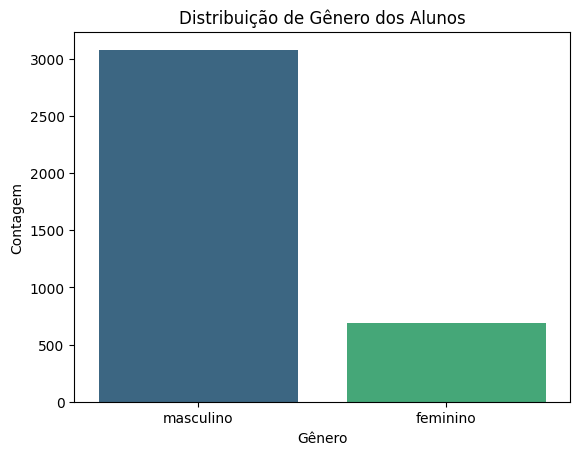

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contagem de alunos por gênero com cores variadas
sns.countplot(x='GENERO', data=alunos, palette='viridis')
plt.title('Distribuição de Gênero dos Alunos')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()

### Distribuição de Idade dos Alunos ###

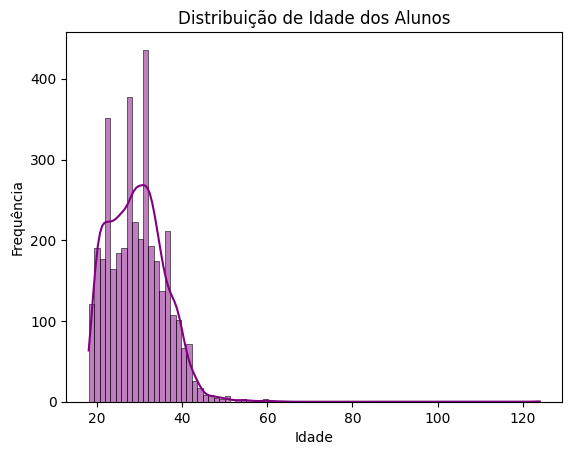

In [22]:
# Histograma da idade dos alunos com cores variadas
sns.histplot(alunos['IDADE'], kde=True, color='purple')
plt.title('Distribuição de Idade dos Alunos')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

### Motivos de Evasão ###

C:\Users\Big Data\AppData\Local\Temp\ipykernel_11880\1216166511.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


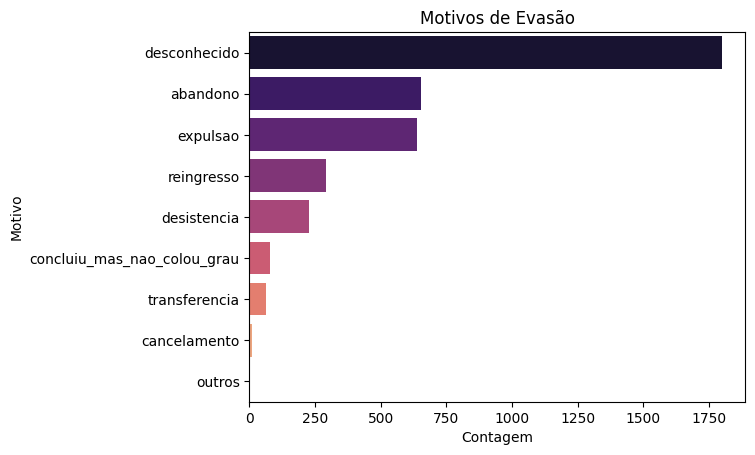

In [23]:
# Contagem de motivos de evasão com cores variadas
sns.countplot(
    y='RAZAO_DE_INATIVIDADE_DE_ALUNO', 
    data=motivo_evasao, 
    order=motivo_evasao['RAZAO_DE_INATIVIDADE_DE_ALUNO'].value_counts().index,
    palette='magma'
)
plt.title('Motivos de Evasão')
plt.xlabel('Contagem')
plt.ylabel('Motivo')
plt.show()

### Tipo de Admissão e Evasão ###

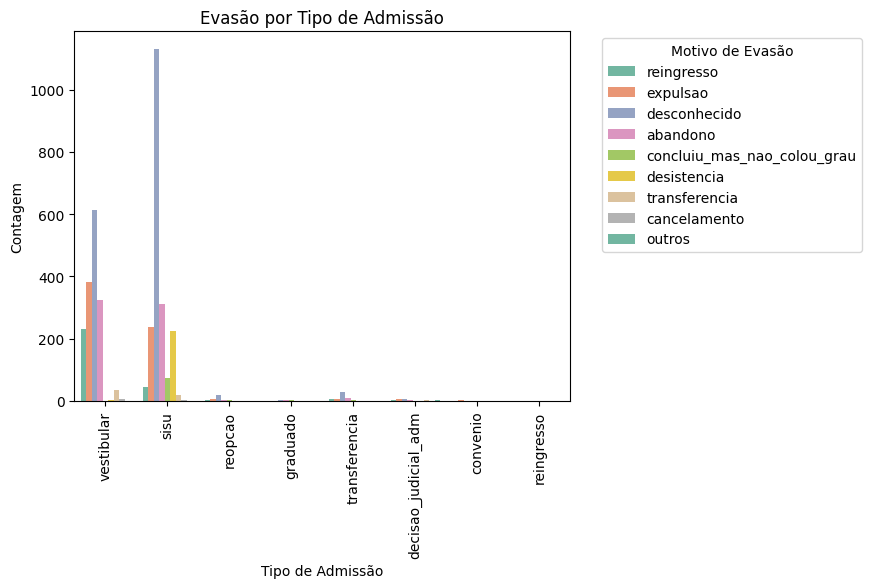

In [24]:
# Contagem de evasão por tipo de admissão com cores variadas
sns.countplot(
    x='TIPO_ADMISSAO', 
    hue='RAZAO_DE_INATIVIDADE_DE_ALUNO', 
    data=merged_df, 
    palette='Set2'
)
plt.title('Evasão por Tipo de Admissão')
plt.xlabel('Tipo de Admissão')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.legend(title='Motivo de Evasão', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Agrupar Motivos Menos Frequentes ###

C:\Users\Big Data\AppData\Local\Temp\ipykernel_11880\1983026973.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


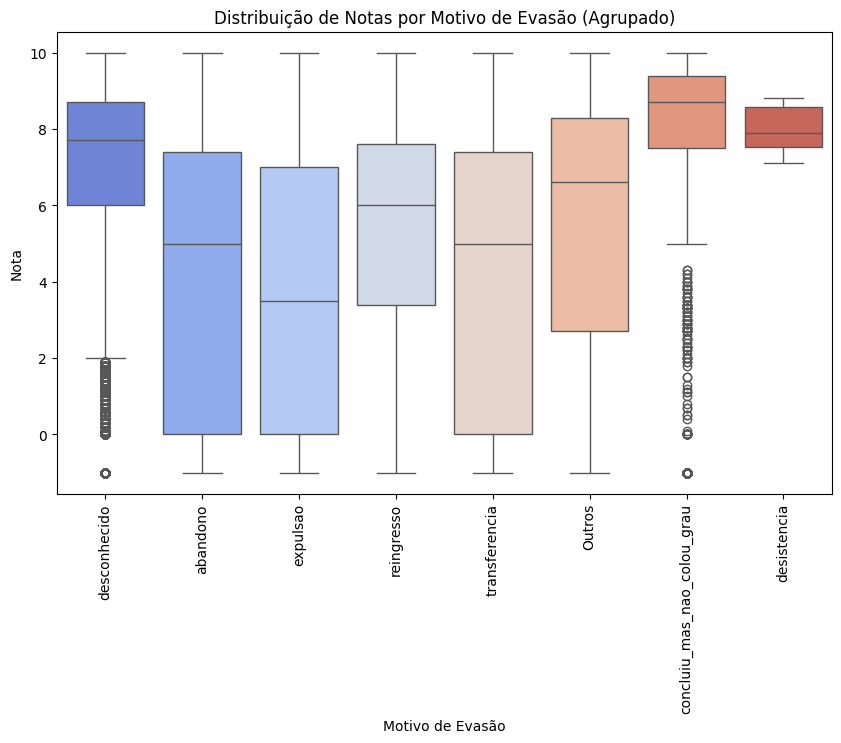

In [26]:
# Contar a frequência de cada motivo de evasão
motivo_counts = motivo_evasao['RAZAO_DE_INATIVIDADE_DE_ALUNO'].value_counts()

# Definir um limite para agrupar motivos menos frequentes
limite = 10  # Motivos com menos de 10 ocorrências serão agrupados

# Criar uma nova coluna com motivos agrupados
motivo_evasao['RAZAO_AGRUPADO'] = motivo_evasao['RAZAO_DE_INATIVIDADE_DE_ALUNO'].apply(
    lambda x: x if motivo_counts[x] >= limite else 'Outros'
)

# Juntar as tabelas matriculas e motivo_evasao (com motivos agrupados)
merged_df = pd.merge(matriculas, motivo_evasao, on='MATRICULA', how='inner')

# Boxplot das notas por motivo de evasão agrupado
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='RAZAO_AGRUPADO', 
    y='NOTA', 
    data=merged_df, 
    palette='coolwarm'
)
plt.title('Distribuição de Notas por Motivo de Evasão (Agrupado)')
plt.xlabel('Motivo de Evasão')
plt.ylabel('Nota')
plt.xticks(rotation=90)
plt.show()

### Filtrar Apenas os Motivos Mais Frequentes ###

###  Relação entre Notas e Evasão ###

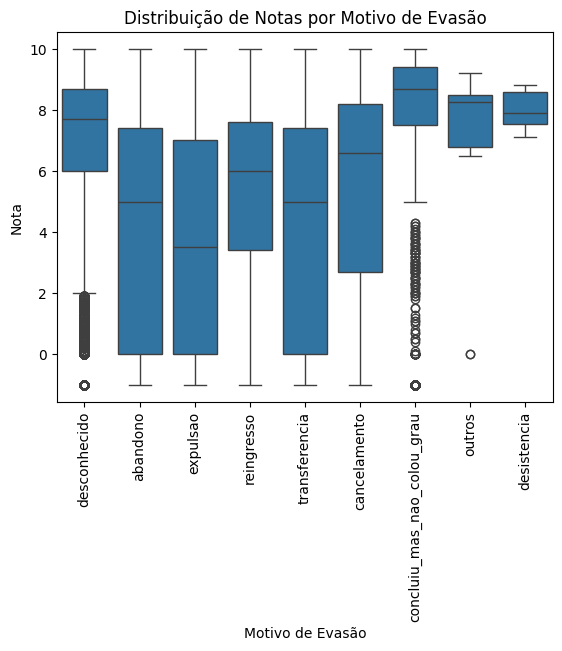

In [19]:
# Juntar as tabelas matriculas e motivo_evasao
merged_df = pd.merge(matriculas, motivo_evasao, on='MATRICULA', how='inner')

# Boxplot das notas por motivo de evasão
sns.boxplot(x='RAZAO_DE_INATIVIDADE_DE_ALUNO', y='NOTA', data=merged_df)
plt.title('Distribuição de Notas por Motivo de Evasão')
plt.xlabel('Motivo de Evasão')
plt.ylabel('Nota')
plt.xticks(rotation=90)
plt.show()

### Curva dos Alunos Matriculados ###

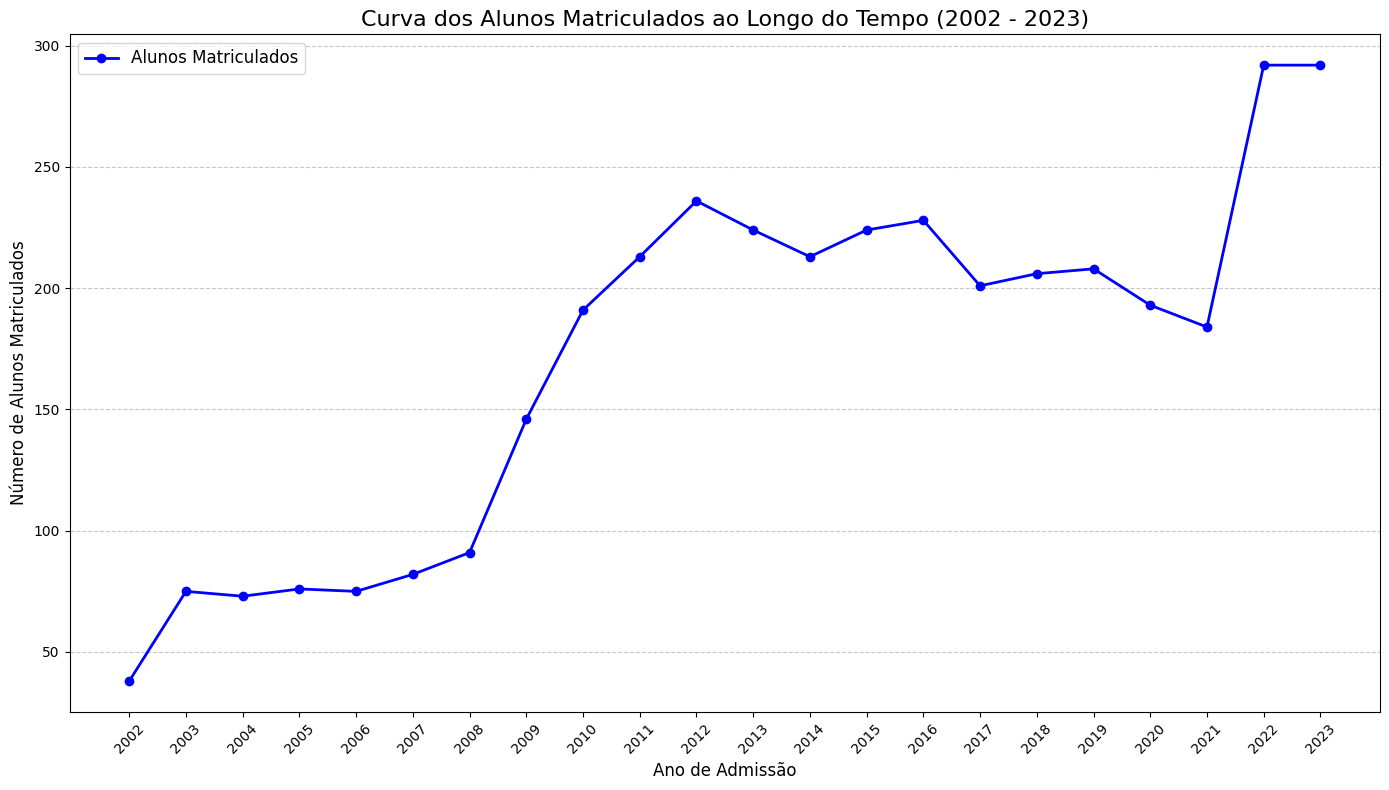


Top 10 Anos com Mais Alunos Matriculados:
ANO_ADMISSAO
2022    292
2023    292
2012    236
2016    228
2013    224
2015    224
2014    213
2011    213
2019    208
2018    206
dtype: int64


In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Caminho para os arquivos tratados
base_path = "C:/Users/Big Data/Documents/databrikcs/tabelas_tratadas/"
caminho_alunos = os.path.join(base_path, "cleaned_alunos.csv")
caminho_motivo_evasao = os.path.join(base_path, "cleaned_tabela_motivo_evasao.csv")

try:
    # Verificar se os arquivos existem
    if not os.path.exists(caminho_alunos):
        raise FileNotFoundError(f"Arquivo não encontrado: {caminho_alunos}")
    if not os.path.exists(caminho_motivo_evasao):
        raise FileNotFoundError(f"Arquivo não encontrado: {caminho_motivo_evasao}")

    # Carregar as tabelas tratadas
    alunos_df = pd.read_csv(caminho_alunos, sep=';', low_memory=False)
    motivo_evasao_df = pd.read_csv(caminho_motivo_evasao, sep=';', low_memory=False)

    # Limpar os nomes das colunas (remover espaços extras)
    alunos_df.columns = alunos_df.columns.str.strip()
    motivo_evasao_df.columns = motivo_evasao_df.columns.str.strip()

    # Verificar e corrigir a tabela motivo_evasao (se necessário)
    if 'MATRICULA;RAZAO_DE_INATIVIDADE_DE_ALUNO' in motivo_evasao_df.columns:
        motivo_evasao_df[['MATRICULA', 'RAZAO_DE_INATIVIDADE_DE_ALUNO']] = motivo_evasao_df[
            'MATRICULA;RAZAO_DE_INATIVIDADE_DE_ALUNO'].str.split(';', expand=True)
        motivo_evasao_df.drop(columns=['MATRICULA;RAZAO_DE_INATIVIDADE_DE_ALUNO'], inplace=True)

    # Confirmar a existência da coluna 'MATRICULA' em ambas as tabelas
    if "MATRICULA" not in alunos_df.columns or "MATRICULA" not in motivo_evasao_df.columns:
        raise KeyError("A coluna 'MATRICULA' não foi encontrada em uma ou ambas as tabelas.")

    # Relacionar tabelas pela coluna 'MATRICULA'
    relacionados = motivo_evasao_df.merge(alunos_df, on="MATRICULA", how="inner")

    # Extrair o ano de admissão a partir do termo de admissão
    if "TERMO_ADMISSAO" in relacionados.columns:
        relacionados["ANO_ADMISSAO"] = pd.to_numeric(
            relacionados["TERMO_ADMISSAO"].astype(str).str.split('.').str[0], errors='coerce'
        )
        relacionados = relacionados.dropna(subset=["ANO_ADMISSAO"])
        relacionados["ANO_ADMISSAO"] = relacionados["ANO_ADMISSAO"].astype(int)

        # Contar o número de alunos matriculados por ano
        matriculados_por_ano = relacionados.groupby("ANO_ADMISSAO").size()

        # Gerar o gráfico
        plt.figure(figsize=(14, 8))
        plt.plot(
            matriculados_por_ano.index,
            matriculados_por_ano.values,
            marker='o',
            linestyle='-',
            color='blue',
            linewidth=2,
            label="Alunos Matriculados"
        )
        plt.title("Curva dos Alunos Matriculados ao Longo do Tempo (2002 - 2023)", fontsize=16)
        plt.xlabel("Ano de Admissão", fontsize=12)
        plt.ylabel("Número de Alunos Matriculados", fontsize=12)
        plt.xticks(ticks=range(2002, 2024), rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.legend(loc="upper left", fontsize=12)
        plt.tight_layout()
        plt.show()

        # Exibir os 10 anos com mais alunos matriculados
        print("\nTop 10 Anos com Mais Alunos Matriculados:")
        print(matriculados_por_ano.sort_values(ascending=False).head(10))
    else:
        print("A coluna 'TERMO_ADMISSAO' não foi encontrada na tabela relacionada.")

except FileNotFoundError as e:
    print(f"Erro: Arquivo não encontrado. {e}")
except KeyError as e:
    print(f"Erro: {e}")
except pd.errors.EmptyDataError:
    print("Erro: O arquivo está vazio ou corrompido.")
except pd.errors.ParserError:
    print("Erro: O arquivo não pôde ser analisado. Verifique o formato e os delimitadores.")
except Exception as e:
    print(f"Erro ao processar os dados: {e}")

In [31]:
# Verificar colunas disponíveis no DataFrame unido
print("Colunas disponíveis no DataFrame:")
print(df.columns)

Colunas disponíveis no DataFrame:
Index(['MATRICULA', 'ID_CIDADAO', 'NOME_x', 'IDADE_x', 'E-MAIL', 'GENERO_x',
       'ESTADO_CIVIL_ALUNOS', 'NACIONALIDADE', 'LOCAL_NASCIMENTO_x',
       'ESTADO_x', 'TERMO_ESTADO', 'RAZAO_INATIVIDADE', 'TIPO_ADMISSAO_x',
       'TERMO_ADMISSAO', 'POLITICA_AFIRMATIVA', 'TIPO_ENSINO_MEDIO_x',
       'ANO_FORMATURA_ENSINO_MEDIO', 'CODIGO_CURSO', 'CODIGO_CURRICULAR',
       ' ALUNOS_ATIVOS', 'EX_ALUNOS', 'ALUNOS_INATIVOS',
       'RAZAO_DE_INATIVIDADE_DE_ALUNO', 'IDADE_y', 'GENERO_y',
       'LOCAL_NASCIMENTO_y', 'ESTADO_y', 'TIPO_ADMISSAO_y',
       'TIPO_ENSINO_MEDIO_y', 'POLITICA_AFIRMATIVA_ALUNOS',
       'CODIGO_DISCIPLINA', 'NOME_y', 'CREDITOS', 'HORAS', 'TERMO', 'ID_CLASS',
       'NOTA', 'ESTATUS', 'TIPO', 'EVADIU'],
      dtype='object')


In [32]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Caminho para os arquivos tratados
base_path = "C:/Users/Big Data/Documents/databrikcs/tabelas_tratadas/"

# Carregar as tabelas tratadas
alunos = pd.read_csv(f"{base_path}cleaned_alunos.csv", sep=';')
matriculas = pd.read_csv(f"{base_path}cleaned_matriculas.csv", sep=';')
motivo_evasao = pd.read_csv(f"{base_path}cleaned_tabela_motivo_evasao.csv", sep=';')
dados_pessoais = pd.read_csv(f"{base_path}cleaned_tabela_dados_pessoais.csv", sep=';')
dados_ingresso = pd.read_csv(f"{base_path}cleaned_tabela_dados_ingresso.csv", sep=';')

# Unir as tabelas pela coluna MATRICULA
df = alunos.merge(motivo_evasao, on="MATRICULA", how="left")
df = df.merge(dados_pessoais, on="MATRICULA", how="left")
df = df.merge(dados_ingresso, on="MATRICULA", how="left")
df = df.merge(matriculas, on="MATRICULA", how="left")

# Definir a variável target (EVADIU: 1 se o aluno evadiu, 0 caso contrário)
df['EVADIU'] = df['RAZAO_DE_INATIVIDADE_DE_ALUNO'].apply(lambda x: 1 if pd.notnull(x) else 0)

# Selecionar colunas relevantes para a modelagem
colunas_relevantes = [
    'IDADE_x', 'GENERO_x', 'ESTADO_CIVIL_ALUNOS', 'CODIGO_CURSO', 'TIPO_ADMISSAO_x', 
    'TIPO_ENSINO_MEDIO_x', 'POLITICA_AFIRMATIVA', 'NOTA', 'ESTATUS', 'EVADIU'
]
df = df[colunas_relevantes]

# Renomear colunas para facilitar o uso
df = df.rename(columns={
    'IDADE_x': 'IDADE',
    'GENERO_x': 'GENERO',
    'TIPO_ADMISSAO_x': 'TIPO_ADMISSAO',
    'TIPO_ENSINO_MEDIO_x': 'TIPO_ENSINO_MEDIO'
})

# Codificar variáveis categóricas usando one-hot encoding
categorical_cols = ['GENERO', 'ESTADO_CIVIL_ALUNOS', 'TIPO_ADMISSAO', 'TIPO_ENSINO_MEDIO', 'POLITICA_AFIRMATIVA', 'ESTATUS']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Normalizar dados numéricos
numerical_cols = ['IDADE', 'NOTA']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Dividir os dados em treino e teste
X = df_encoded.drop(columns=['EVADIU'])
y = df_encoded['EVADIU']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Salvar os dados preparados (opcional)
X_train.to_csv(f"{base_path}X_train.csv", index=False, sep=';')
X_test.to_csv(f"{base_path}X_test.csv", index=False, sep=';')
y_train.to_csv(f"{base_path}y_train.csv", index=False, sep=';')
y_test.to_csv(f"{base_path}y_test.csv", index=False, sep=';')

print("Dados preparados para modelagem!")
print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

Dados preparados para modelagem!
Tamanho do conjunto de treino: (91568, 33)
Tamanho do conjunto de teste: (39244, 33)


### Interpretação dos Dados Preparados
Tamanho dos Conjuntos de Treino e Teste:
Conjunto de Treino: 91.568 amostras.
Conjunto de Teste: 39.244 amostras.
Isso significa que os dados foram divididos em uma proporção de 70% para treino e 30% para teste, que é uma divisão comum em machine learning.
Número de Features (Variáveis de Entrada):
O conjunto de treino e teste tem 33 features.
Essas features são o resultado da codificação das variáveis categóricas (one-hot encoding) e da normalização das variáveis numéricas.
Variável Target:
A variável target é EVADIU, que indica se o aluno evadiu (1) ou não (0).
Essa variável será usada para treinar e avaliar os modelos de predição de evasão.
Features Incluídas:
As features incluem:
Variáveis demográficas: IDADE, GENERO, ESTADO_CIVIL_ALUNOS.
Variáveis acadêmicas: CODIGO_CURSO, TIPO_ADMISSAO, TIPO_ENSINO_MEDIO, POLITICA_AFIRMATIVA, NOTA, ESTATUS.
Variáveis codificadas: As colunas categóricas foram transformadas em variáveis binárias (0 ou 1) usando one-hot encoding.

### Próximos Passos: Escolha e Aplicação do Modelo ###

### 1. Escolha do Modelo
Vamos considerar modelos comuns para problemas de classificação binária (como prever evasão):

Regressão Logística:

Um modelo simples e interpretável, ideal para entender a importância das features.

Boa escolha para um primeiro modelo.

Árvores de Decisão:

Modelo intuitivo que divide os dados com base em regras simples.

Pode capturar relações não lineares entre as features e a target.

Random Forest:

Combina várias árvores de decisão para melhorar a precisão e evitar overfitting.

Robustez e capacidade de lidar com dados desbalanceados.

XGBoost:

Um dos modelos mais poderosos para problemas de classificação.

Alta precisão, mas pode ser mais complexo de interpretar.

### 2. Justificativa da Escolha
Regressão Logística será usada como um modelo baseline para comparar com outros modelos mais complexos.

Random Forest e XGBoost serão usados para melhorar a precisão e capturar relações mais complexas nos dados.

### 3. Aplicação dos Modelos
Treinaremos cada modelo no conjunto de treino (X_train, y_train).

Avaliaremos o desempenho no conjunto de teste (X_test, y_test) usando métricas como:

Acurácia: Porcentagem de previsões corretas.

Precisão: Porcentagem de alunos previstos como evadidos que realmente evadiram.

Recall: Porcentagem de alunos que evadiram e foram corretamente identificados.

F1-Score: Média harmônica entre precisão e recall.

### Visualização com PySpark ###


### Converter DataFrame do PySpark para Pandas ###